# TITANIC SURVIVAL PREDICTION PROJECT

### IMPORTING LIBRARIES

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis:

### BASIC INFORMATION OF DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### CHECK NULL VALUES

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### DROPING NULL VALUES

In [7]:
df.drop('Cabin',axis=1,inplace=True)

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.drop(['PassengerId','Name','Ticket','Fare'],axis=1,inplace=True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


### UNIVARIATE AND BIVARIATE ANALYSIS OF DATASET

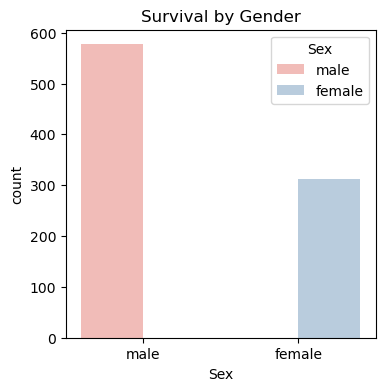

Text(0.5, 1.0, 'Count of persons survived')

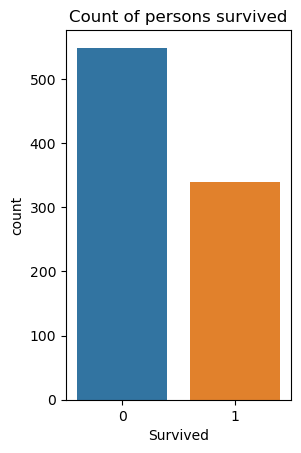

In [13]:
plt.figure(figsize = (4,4))
sns.countplot(x ="Sex", data = df, hue ="Sex", palette ="Pastel1")
plt.title("Survival by Gender")
plt.show()

plt.subplot(1,2,1)
sns.countplot(x=df['Survived'])
plt.title('Count of persons survived')

#### This both univariate graphs clearly shows that, the Male passangers survived more than the Female passangers.

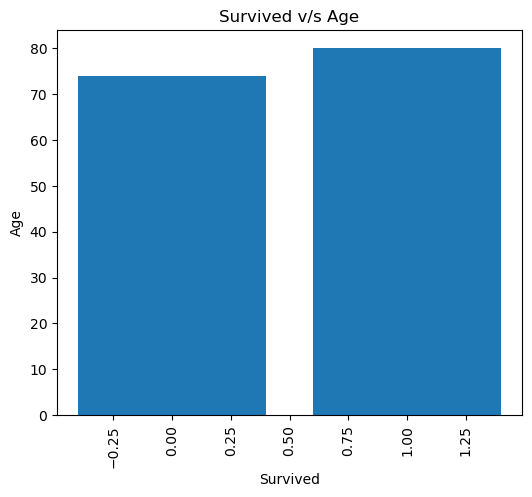

In [14]:
x=df['Survived']
y=df['Age']

plt.figure(figsize=(6,5))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title("Survived v/s Age")
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

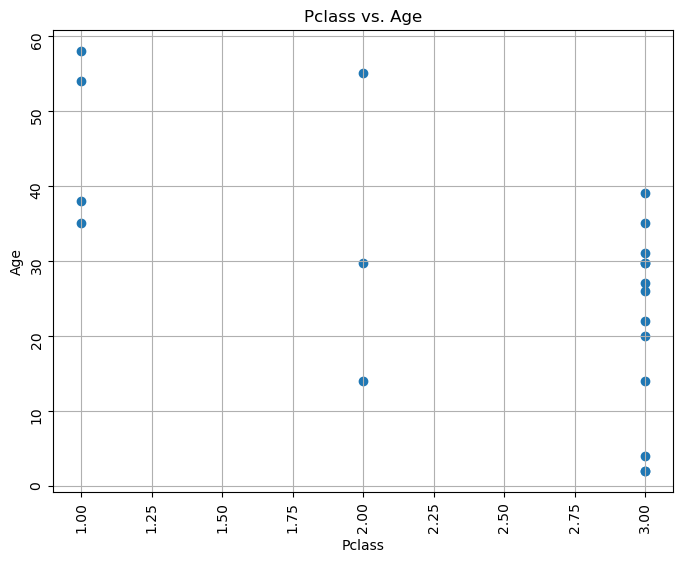

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(x=df['Pclass'][0:20], y=df['Age'][0:20])
plt.title('Pclass vs. Age')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.grid()
plt.show()

#### In this both bivariate graph represents the survival by age and the passangers ages with their different classes.

### STATISTICAL INFORMATION OF DATASET

In [16]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452
std,0.486260,0.834700,12.968366,1.103705,0.806761
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [17]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151
Pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824
Age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232
SibSp,-0.034040,0.081656,-0.231875,1.000000,0.414542
Parch,0.083151,0.016824,-0.178232,0.414542,1.000000


### SEPARATING INTO FEATURES AND TARGET COLUMNS

In [18]:
x=df.iloc[:,1:]

x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [19]:
y=df['Survived']

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### OUTLIERS

#### Here, Age and fare column has outliers. Which is common nothing that can affect the precitions of dependent variable so leaving them be.

### SKEWNESS

In [26]:
col=x.select_dtypes(['int','float']).columns
col

Index(['Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')

In [31]:
from scipy.stats import skew

In [32]:
skew(y)

0.4837496405947267

In [30]:
skew(x[['Pclass','Age','SibSp','Parch']])

array([-0.63592246,  0.43099149,  3.68482683,  2.74052607])

#### In this phase of EDA, after finding the skewness of all Numerical features understand that no need to remove it. and it does not impact the model's predictive performance.

### ENCODING

In [33]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [34]:
oe.fit_transform(x[['Embarked','Sex']])

array([[2., 1.],
       [0., 0.],
       [2., 0.],
       ...,
       [2., 0.],
       [0., 1.],
       [1., 1.]])

In [35]:
catcol = x.select_dtypes(object).columns

In [36]:
x[catcol] = oe.fit_transform(x[catcol])

In [37]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1.0,22.0,1,0,2.0
1,1,0.0,38.0,1,0,0.0
2,3,0.0,26.0,0,0,2.0
3,1,0.0,35.0,1,0,2.0
4,3,1.0,35.0,0,0,2.0


### Spliting the data into training and testing

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

### 1 - Predicting by using Logistics Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [40]:
from sklearn.metrics import classification_report, accuracy_score

In [41]:
#Evaluating model

cr=classification_report(ytest,ypred)
print(cr)
ac = accuracy_score(ytest,ypred)
print("Accuracy score : ",ac)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       166
           1       0.78      0.78      0.78       101

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267

Accuracy score :  0.8352059925093633


#### We have achieved an Average Accuracy of 84 % which is almost good. Lets see, if we can increase this accuracy by hyper tuning.

### HPT

In [42]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [43]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       166
           1       0.76      0.77      0.77       101

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



#### By using liblinear we get Accuracy of 82%

In [44]:
logreg=LogisticRegression(solver='saga')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [45]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       166
           1       0.88      0.50      0.64       101

    accuracy                           0.79       267
   macro avg       0.82      0.73      0.74       267
weighted avg       0.81      0.79      0.77       267



#### By using Saga solver we get Accuracy of 79%

In [46]:
logreg=LogisticRegression(solver='sag')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [47]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       166
           1       0.80      0.70      0.75       101

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267



#### By using Sag solver we get Accuracy of 82%

### 2 - Predicting by using Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier()

In [50]:
def mymodel(model):
 model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)
 print(accuracy_score(ytest,ypred))
 print(classification_report(ytest,ypred))
 
 return model

In [51]:
mymodel(dt)

0.7902621722846442
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       166
           1       0.72      0.73      0.73       101

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



DecisionTreeClassifier()

#### By using Decision Tree, we get accuracy of 79% which is not good but lets check whether we get more accurcy by hyper tunning.

In [76]:
from sklearn import tree

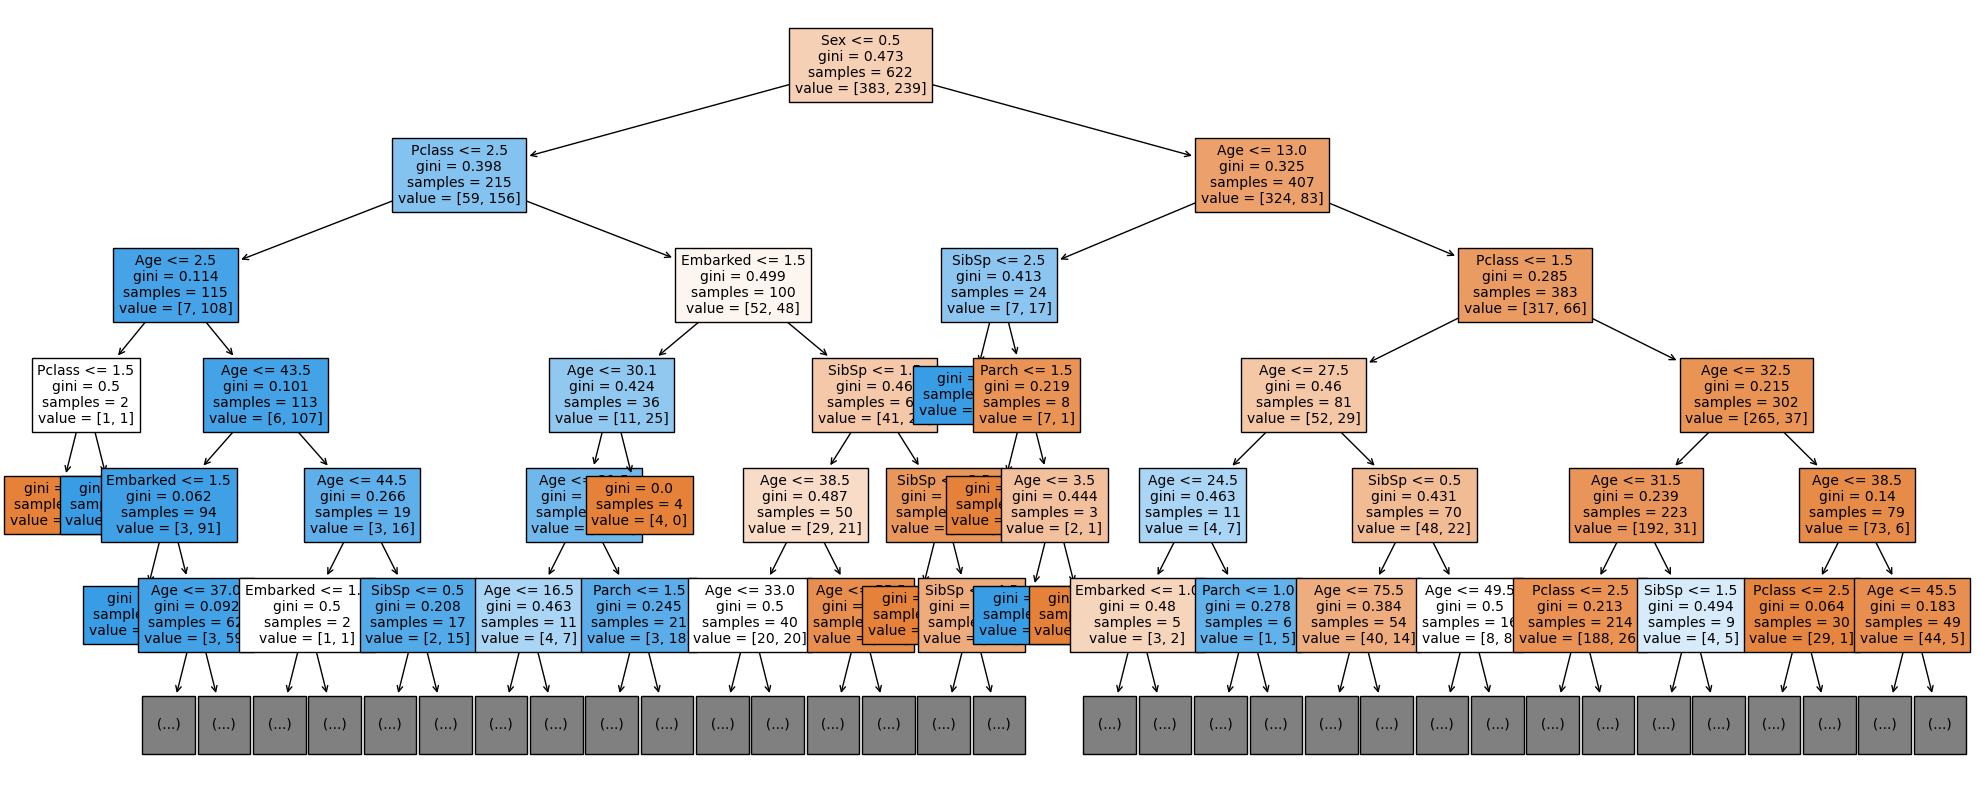

In [77]:
fig,ax = plt.subplots(figsize = (25,10))
chart = tree.plot_tree(dt, max_depth =5, feature_names = x.columns, filled = True, fontsize=10)
plt.savefig("DecisionTree.jpg")

In [53]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.9405144694533762 
 test score : 0.7902621722846442


#### Train acc is high and Test acc is low (Low bias high varience)

### HPT

#### i - max_depth

In [54]:
for i in range(20,35):
 dt1 = DecisionTreeClassifier(max_depth = i)
 dt1.fit(xtrain,ytrain)
 ypred = dt1.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.7902621722846442
max_depth = 21 accuracy : 0.7902621722846442
max_depth = 22 accuracy : 0.8052434456928839
max_depth = 23 accuracy : 0.8089887640449438
max_depth = 24 accuracy : 0.7940074906367042
max_depth = 25 accuracy : 0.797752808988764
max_depth = 26 accuracy : 0.797752808988764
max_depth = 27 accuracy : 0.7902621722846442
max_depth = 28 accuracy : 0.797752808988764
max_depth = 29 accuracy : 0.797752808988764
max_depth = 30 accuracy : 0.797752808988764
max_depth = 31 accuracy : 0.7902621722846442
max_depth = 32 accuracy : 0.7940074906367042
max_depth = 33 accuracy : 0.7902621722846442
max_depth = 34 accuracy : 0.7865168539325843


In [55]:
dt2 = DecisionTreeClassifier(max_depth = 24)
mymodel(dt2)

0.797752808988764
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       166
           1       0.73      0.74      0.74       101

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



DecisionTreeClassifier(max_depth=24)

#### By using Decision Tree Max Depth function, we achive the accuracy of 80%

In [56]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.9405144694533762 
 test score : 0.797752808988764


#### ii - min_samples_split

In [57]:
for i in range(90,110):
 dt3 = DecisionTreeClassifier(min_samples_split = i)
 dt3.fit(xtrain,ytrain)
 ypred = dt3.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 90 accuracy : 0.8014981273408239
max_depth = 91 accuracy : 0.8014981273408239
max_depth = 92 accuracy : 0.8014981273408239
max_depth = 93 accuracy : 0.8014981273408239
max_depth = 94 accuracy : 0.8014981273408239
max_depth = 95 accuracy : 0.8014981273408239
max_depth = 96 accuracy : 0.8014981273408239
max_depth = 97 accuracy : 0.8014981273408239
max_depth = 98 accuracy : 0.8014981273408239
max_depth = 99 accuracy : 0.8014981273408239
max_depth = 100 accuracy : 0.8014981273408239
max_depth = 101 accuracy : 0.7715355805243446
max_depth = 102 accuracy : 0.7715355805243446
max_depth = 103 accuracy : 0.7715355805243446
max_depth = 104 accuracy : 0.7715355805243446
max_depth = 105 accuracy : 0.7715355805243446
max_depth = 106 accuracy : 0.7715355805243446
max_depth = 107 accuracy : 0.7715355805243446
max_depth = 108 accuracy : 0.7715355805243446
max_depth = 109 accuracy : 0.7715355805243446


In [58]:
dt4 = DecisionTreeClassifier(min_samples_split = 92)
mymodel(dt4)

0.8014981273408239
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       166
           1       0.76      0.69      0.73       101

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



DecisionTreeClassifier(min_samples_split=92)

#### By using Decision Tree Min Sample Split function, we achive the accuracy of 80%

In [59]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.8183279742765274 
 test score : 0.8014981273408239


#### iii - min_samples_leaf

In [60]:
for i in range(30,50):
 dt5 = DecisionTreeClassifier(min_samples_leaf = i)
 dt5.fit(xtrain,ytrain)
 ypred = dt5.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 30 accuracy : 0.8014981273408239
max_depth = 31 accuracy : 0.8014981273408239
max_depth = 32 accuracy : 0.8014981273408239
max_depth = 33 accuracy : 0.8014981273408239
max_depth = 34 accuracy : 0.8014981273408239
max_depth = 35 accuracy : 0.8352059925093633
max_depth = 36 accuracy : 0.8352059925093633
max_depth = 37 accuracy : 0.8352059925093633
max_depth = 38 accuracy : 0.8352059925093633
max_depth = 39 accuracy : 0.8352059925093633
max_depth = 40 accuracy : 0.8352059925093633
max_depth = 41 accuracy : 0.8352059925093633
max_depth = 42 accuracy : 0.8352059925093633
max_depth = 43 accuracy : 0.8352059925093633
max_depth = 44 accuracy : 0.8389513108614233
max_depth = 45 accuracy : 0.8052434456928839
max_depth = 46 accuracy : 0.8052434456928839
max_depth = 47 accuracy : 0.8052434456928839
max_depth = 48 accuracy : 0.8052434456928839
max_depth = 49 accuracy : 0.8052434456928839


In [61]:
dt6 = DecisionTreeClassifier(min_samples_leaf = 44)
mymodel(dt6)

0.8389513108614233
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       166
           1       0.85      0.69      0.77       101

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



DecisionTreeClassifier(min_samples_leaf=44)

In [62]:
train = dt6.score(xtrain,ytrain)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.7877813504823151 
 test score : 0.8389513108614233


#### By using Decision Tree min_samples_leaf function we achive the accuracy of 84%

### 3 - Predicting by using KNN Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) # by default n_neighbors = 5
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [64]:
#evaluate the Model

from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,ypred)
print(ac)

0.7490636704119851


#### By using KNN CLASSIFIER, we get 75% accuracy which is not good.

### 4 - Predicting by using Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       166
           1       0.74      0.77      0.76       101

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



#### By using Random Forest, we get 81% of accuracy.

### 5 - Predicting by using Encemble Learning

### A) - BOOSTING

### i - Adaboost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



#### By using AdaBoost Classifier, we get 83% of accuracy.

### ii - Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       166
           1       0.82      0.73      0.77       101

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267



#### By using Gradient Boosting algorithm we get 84% of accuracy.

### iii - XG Boosting

In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       166
           1       0.73      0.75      0.74       101

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



#### By using XG Boost algorithm, we get 80% of accuracy.

### B) - BAGGING

In [70]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       166
           1       0.76      0.78      0.77       101

    accuracy                           0.82       267
   macro avg       0.81      0.82      0.81       267
weighted avg       0.83      0.82      0.82       267



#### By using Bagging Classifier on Logostic Regression, we get 82% of accuracy which is not good for prediction.

In [71]:
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       166
           1       0.76      0.79      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



#### By using Bagging Classifier on Decision Tree we get 83% of accuracy.``

In [72]:
models =[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))

In [73]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models) # estimators --> model name
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       166
           1       0.86      0.69      0.77       101

    accuracy                           0.84       267
   macro avg       0.85      0.81      0.82       267
weighted avg       0.85      0.84      0.84       267



In [74]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models,voting='soft') # estimators --> model na
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       166
           1       0.77      0.75      0.76       101

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



#### By using Voting Classifier, we get 84% (hard voting) and 82% (soft voting) of of accuracy.

### CONCLUSION

### Based on the above all Algorithm of accuracy scores, we should go ahead with decsion tree ,Gradient Boosting or Logistics Regression.